<a href="https://colab.research.google.com/github/SagwaM/PLP-Python-Week-7-Basic-Data-Analysis/blob/main/Iris_Flower_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from logging import warning
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Specify the CSV file name or path
csv_file = 'IRIS.csv'

# Attempt to load the CSV file with error handling
try:
    df = pd.read_csv(csv_file)
    print("Dataset loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: The file '{csv_file}' was not found.")
    raise e
except Exception as e:
    print("An unexpected error occurred while loading the dataset.")
    raise e


Dataset loaded successfully!


In [15]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [16]:
# Display a summary of the dataset (data types, non-null counts, etc.)
print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [17]:
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [18]:
# Check if there are any missing values in the dataset
if df.isnull().values.any():
    # For numerical columns, fill missing values with the column mean
    df.fillna(df.mean(), inplace=True)
    print("\nMissing values found and filled with the column mean.")
else:
    print("\nNo missing values found in the dataset.")



No missing values found in the dataset.


In [19]:
# Compute and display basic statistics for numerical columns
print("\nBasic Statistics for Numerical Columns:")
print(df.describe())



Basic Statistics for Numerical Columns:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [20]:
# Assuming the dataset has a 'species' column,
# group the dataset by 'species' and compute the mean sepal length for each group.
if 'species' in df.columns and 'sepal_length' in df.columns:
    grouped_means = df.groupby('species')['sepal_length'].mean().reset_index()
    print("\nMean Sepal_Length per Species:")
    print(grouped_means)
else:
    print("\nRequired columns for grouping ('species' and 'sepal_length') are not found in the dataset.")



Mean Sepal_Length per Species:
           species  sepal_length
0      Iris-setosa         5.006
1  Iris-versicolor         5.936
2   Iris-virginica         6.588


# VISUALIZATIONS


VISUALIZATION 1: Line Chart (Time Series Trend)

* Since the Iris dataset does not naturally contain a time column, we'll simulate one by creating a new column representing sequential days. Then, we'll plot a line chart for one species (e.g., 'Iris-setosa') to visualize the trend of sepal length over time.

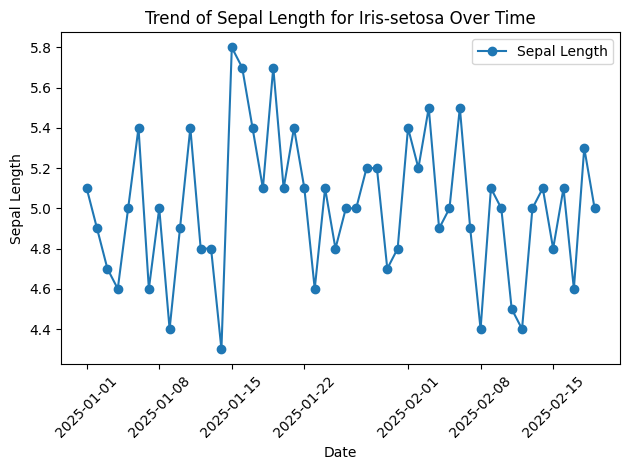

In [25]:
%matplotlib inline

# Simulate a 'Day' column (each row represents one day)
df['Day'] = pd.date_range(start='2025-01-01', periods=len(df), freq='D')

# Filter data for a specific species; ensure the species name matches your dataset
species_example = 'Iris-setosa'  # Adjust this if your dataset uses a different naming convention
df_setosa = df[df['species'] == species_example]

# Check if the filtered DataFrame is empty
if df_setosa.empty:
    print(f"No data found for species: {species_example}")
else:
    plt.figure()
    plt.plot(df_setosa['Day'], df_setosa['sepal_length'], marker='o', linestyle='-', label='Sepal Length')
    plt.title(f"Trend of Sepal Length for {species_example} Over Time")
    plt.xlabel("Date")
    plt.ylabel("Sepal Length")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


VISUALIZATION 2: Bar Chart (Comparison Across Categories)
* We'll create a bar chart to compare the average petal length for each species.

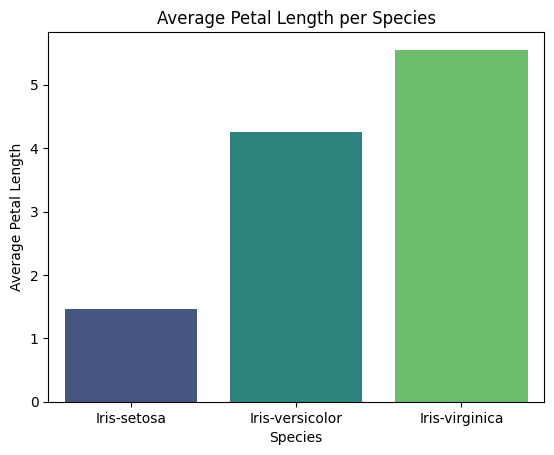

In [26]:
# Compute the average petal length for each species
if 'species' in df.columns and 'petal_length' in df.columns:
    grouped_petal = df.groupby('species')['petal_length'].mean().reset_index()

    plt.figure()
    sns.barplot(x='species', y='petal_length', data=grouped_petal, palette="viridis")
    plt.title("Average Petal Length per Species")
    plt.xlabel("Species")
    plt.ylabel("Average Petal Length")
    plt.show()
else:
    print("Required columns for the bar chart ('species' and 'petal_length') are not found.")


VISUALIZATION: Histogram (Distribution of a Numerical Column)

* We'll create a histogram to examine the distribution of sepal width.

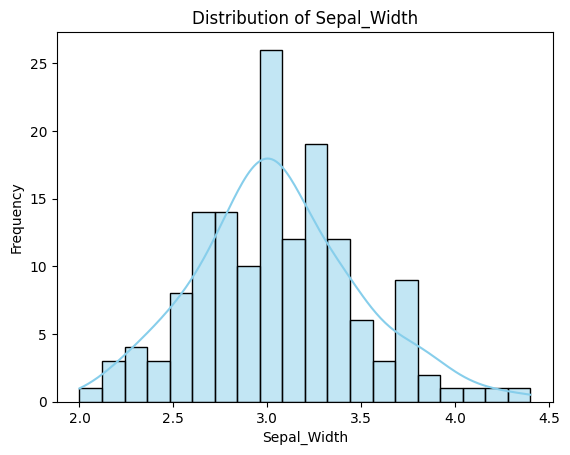

In [22]:
# Plot a histogram of the 'sepal width (cm)' column
if 'sepal_width' in df.columns:
    plt.figure()
    sns.histplot(df['sepal_width'], bins=20, kde=True, color='skyblue')
    plt.title("Distribution of Sepal_Width")
    plt.xlabel("Sepal_Width")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'sepal width (cm)' not found in the dataset.")


SCATTER PLOT (Relationship between Two Numerical Columns)

* We'll use a scatter plot to visualize the relationship between sepal length and petal length, using different colors (and markers) for each species.

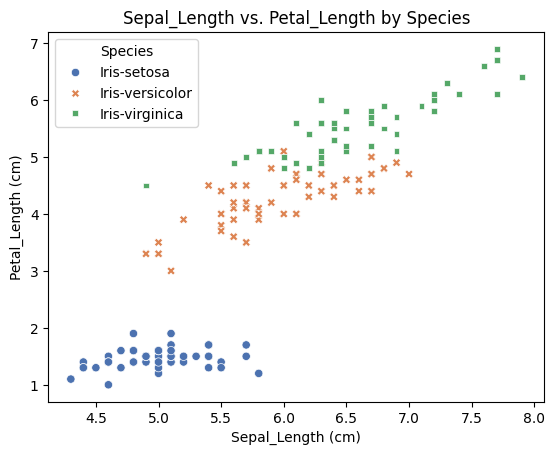

In [23]:
# Create a scatter plot of sepal length vs. petal length, colored by species
if all(col in df.columns for col in ['sepal_length', 'petal_length', 'species']):
    plt.figure()
    sns.scatterplot(x='sepal_length', y='petal_length', hue='species', style='species', data=df, palette="deep")
    plt.title("Sepal_Length vs. Petal_Length by Species")
    plt.xlabel("Sepal_Length (cm)")
    plt.ylabel("Petal_Length (cm)")
    plt.legend(title='Species')
    plt.show()
else:
    print("One or more required columns for the scatter plot are missing.")
